In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [7]:
df = pd.read_csv('data/askreddit_12.csv')

In [8]:
df.loc[df['gilded'] >= 1, 'target'] = 1
df.loc[df['gilded'] == 0, 'target'] = 0
df['target'] = df['target'].astype(int)

In [9]:
df.head()

,id,parent_id,link_id,gilded,author,created,is_submitter,permalink,score,body,question,target
0,ed1czme,t3_ablzuq,t3_ablzuq,0,sweatybeard,1.546379e+09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,12174,"But when I finally do, it'll be the years bigg...","People who haven't pooped in 2019 yet, why are...",0
1,ed1d2z7,t3_ablzuq,t3_ablzuq,1,ButtholeLinoleum,1.546379e+09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,14251,I've been pissing out my ass all fuckin day.,"People who haven't pooped in 2019 yet, why are...",1
2,ed1emmi,t3_ablzuq,t3_ablzuq,0,abksploder,1.546380e+09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,34840,Bold of you to assume I'm going to take a shit...,"People who haven't pooped in 2019 yet, why are...",0
3,ed1dhh6,t3_ablzuq,t3_ablzuq,0,adsadsadsadsads,1.546379e+09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,19264,We have guests and I literally can't relax.,"People who haven't pooped in 2019 yet, why are...",0
4,ed1dqvy,t3_ablzuq,t3_ablzuq,2,KixStar,1.546379e+09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,35929,I caught a diarrhea stomach bug and have been ...,"People who haven't pooped in 2019 yet, why are...",1


In [10]:
df.isnull().sum()

id              0
parent_id       0
link_id         0
gilded          0
author          0
created         0
is_submitter    0
permalink       0
score           0
body            0
question        0
target          0
dtype: int64

In [11]:
df[df.duplicated()]

,id,parent_id,link_id,gilded,author,created,is_submitter,permalink,score,body,question,target


In [12]:
np.argmax(df['gilded'])

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


41506

In [13]:
df['gilded'][41506]

15

In [14]:
df.groupby('gilded')['id'].count()

gilded
0     82222
1        35
2        10
3         1
4         1
5         1
7         1
15        1
Name: id, dtype: int64

In [15]:
df_gilded = df[df.target == 1]

(-0.5, 743.5, 543.5, -0.5)

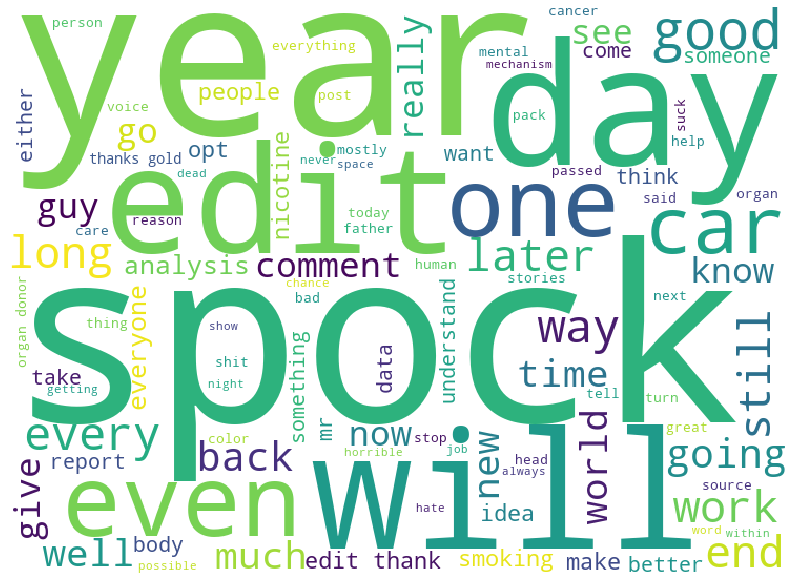

In [16]:
text = ' '
stopwords = set(STOPWORDS) 
  
for x in df_gilded.body: 
    tokens = x.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        text = text + words + ' '
        
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")

In [17]:
df['question'].unique()

array(["People who haven't pooped in 2019 yet, why are you still holding on to last years shit?",
       'Stan Lee has passed away at 95 years old',
       'Reddit, how would you feel about a law that bans radio stations from playing commercials with honking/beeping/siren noises in them?',
       'Without saying what the category is, what are your top five?',
       'Anthony Bourdain once said "There\'s a guy in my head, and all he wants to do is lay in bed all day long, smoke pot, and watch old movies and cartoons. My life is a series of strategems, to avoid, and outwit that guy". Who is "that guy" for you, and what do you do to avoid him?',
       'With all of the negative headlines dominating the news these days, it can be difficult to spot signs of progress. What makes you optimistic about the future?',
       '[Serious] Americans, would you be in support of putting a law in place that government officials, such as senators and the president, go without pay during shutdowns like th

In [48]:
import nltk
import string

def tokenize(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()

    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        return stem.stem(token)

In [53]:
from nltk import FreqDist

golds = df_gilded['body'].tolist()
gold_corpus = [tokenize(doc) for doc in golds]
fdist = FreqDist(gold_corpus)

In [54]:
fdist

FreqDist({'i': 14, 'the': 8, 'that': 3, 'we': 2, 'as': 2, 'it': 1, 'qualiti': 1, '``': 1, '...': 1, 'whi': 1, ...})

## Pipeline Potentials 

In [2]:
df2 = pd.read_csv('data/askreddit_top_sm.csv')

In [3]:
df2.head()

,id,parent_id,link_id,gilded,author,created,is_submitter,permalink,score,body,question,target
0,ed1czme,t3_ablzuq,t3_ablzuq,0,sweatybeard,2019-01-01 15:35:24,False,/r/AskReddit/comments/ablzuq/people_who_havent...,12166,"But when I finally do, it'll be the years bigg...","People who haven't pooped in 2019 yet, why are...",0
1,ed1d2z7,t3_ablzuq,t3_ablzuq,1,ButtholeLinoleum,2019-01-01 15:36:36,False,/r/AskReddit/comments/ablzuq/people_who_havent...,14254,I've been pissing out my ass all fuckin day.,"People who haven't pooped in 2019 yet, why are...",1
2,ed1emmi,t3_ablzuq,t3_ablzuq,0,abksploder,2019-01-01 15:56:33,False,/r/AskReddit/comments/ablzuq/people_who_havent...,34842,Bold of you to assume I'm going to take a shit...,"People who haven't pooped in 2019 yet, why are...",0
3,ed1dhh6,t3_ablzuq,t3_ablzuq,0,adsadsadsadsads,2019-01-01 15:41:49,False,/r/AskReddit/comments/ablzuq/people_who_havent...,19268,We have guests and I literally can't relax.,"People who haven't pooped in 2019 yet, why are...",0
4,ed1dqvy,t3_ablzuq,t3_ablzuq,2,KixStar,2019-01-01 15:45:09,False,/r/AskReddit/comments/ablzuq/people_who_havent...,35935,I caught a diarrhea stomach bug and have been ...,"People who haven't pooped in 2019 yet, why are...",1


## Word Counts

In [4]:
def simplify_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [9]:
df2['simplebody'] = df2['body'].map(lambda x: simplify_text(x))

In [11]:
df2['num_wds'] = df2['simplebody'].apply(lambda x: len(x.split()))

39.701

In [13]:
print(df2['num_wds'].mean(), df2['num_wds'].min(), df2['num_wds'].max())

39.701 1 808


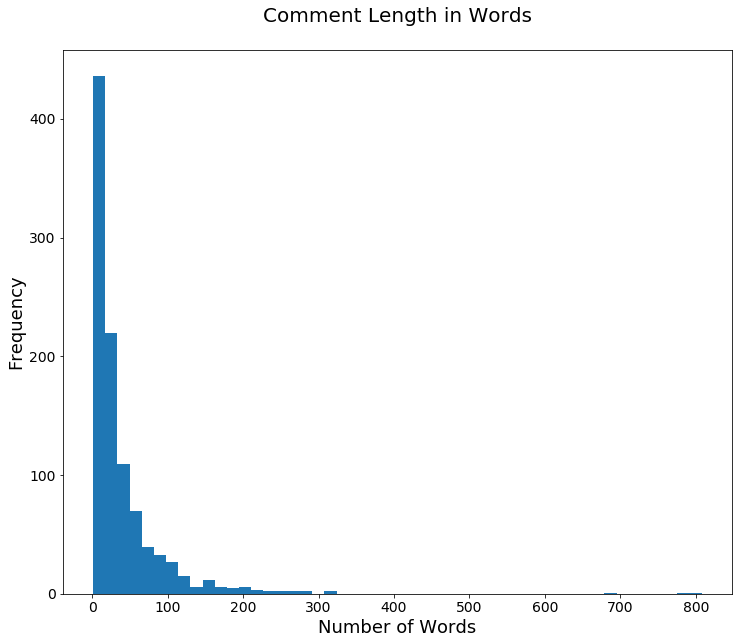

In [14]:
ax=df2['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Comment Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [15]:
df_gild2 = df2[df2.target == 1]

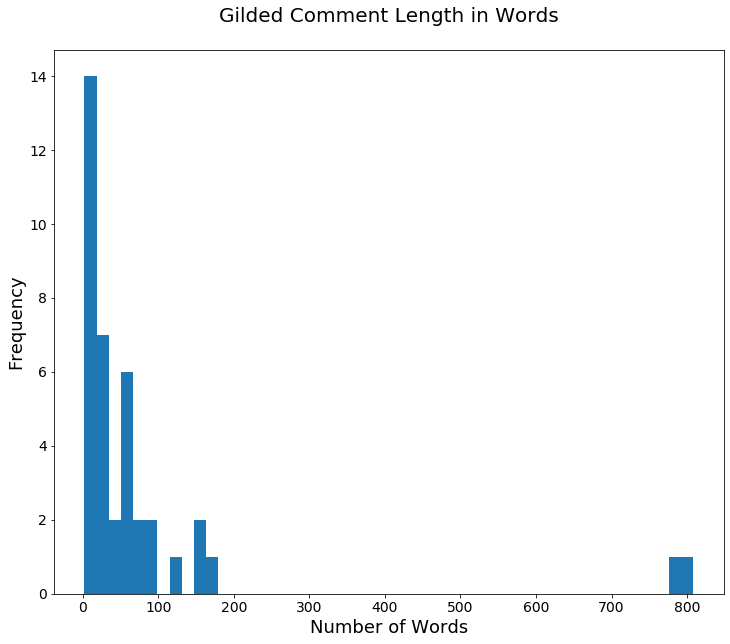

In [16]:
ax=df_gild2['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Gilded Comment Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [17]:
def count_text(doc):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", doc.lower())
    clean2 = re.sub(r'\W+', ' ', clean1)
    return len(clean2.split())

In [19]:
Xs = df2['body'].tolist()

In [21]:
Xc = [count_text(doc) for doc in Xs]

In [23]:
wordcounts = np.array(df2["num_wds"])
wordcounts_g = np.array(df_gild2["num_wds"])

In [30]:
wc_mu = np.mean(wordcounts)
wc_mu_g = np.mean(wordcounts_g)
wc_var = np.var(wordcounts)
wc_var_g = np.var(wordcounts_g)
wc_mu, wc_mu_g

(39.701, 83.61538461538461)

In [27]:
from scipy import stats

In [29]:
stats.ttest_ind(wordcounts, wordcounts_g)

Ttest_indResult(statistic=-3.967260424165894, pvalue=7.770246263644204e-05)

In [31]:
Xc

[13,
 9,
 13,
 8,
 43,
 4,
 2,
 8,
 9,
 11,
 6,
 6,
 7,
 17,
 6,
 13,
 7,
 26,
 13,
 4,
 17,
 13,
 14,
 5,
 21,
 1,
 5,
 11,
 37,
 6,
 7,
 14,
 14,
 91,
 13,
 7,
 11,
 16,
 3,
 10,
 18,
 12,
 9,
 7,
 3,
 8,
 9,
 21,
 24,
 10,
 25,
 12,
 63,
 6,
 1,
 8,
 53,
 14,
 28,
 7,
 6,
 11,
 35,
 3,
 8,
 14,
 9,
 20,
 4,
 13,
 5,
 25,
 4,
 9,
 38,
 23,
 29,
 14,
 22,
 16,
 42,
 10,
 5,
 7,
 24,
 5,
 6,
 17,
 8,
 3,
 8,
 12,
 3,
 14,
 26,
 4,
 27,
 14,
 6,
 7,
 53,
 198,
 27,
 24,
 143,
 16,
 29,
 77,
 35,
 213,
 23,
 37,
 130,
 81,
 15,
 17,
 15,
 81,
 206,
 679,
 20,
 247,
 100,
 152,
 102,
 65,
 9,
 21,
 18,
 100,
 21,
 67,
 10,
 10,
 53,
 75,
 37,
 90,
 287,
 1,
 81,
 33,
 59,
 12,
 232,
 50,
 50,
 45,
 33,
 161,
 34,
 30,
 53,
 62,
 43,
 20,
 14,
 55,
 40,
 1,
 7,
 36,
 45,
 275,
 21,
 21,
 25,
 42,
 4,
 155,
 65,
 14,
 151,
 9,
 75,
 72,
 53,
 33,
 1,
 156,
 97,
 59,
 113,
 28,
 6,
 40,
 22,
 1,
 21,
 8,
 20,
 96,
 91,
 39,
 24,
 71,
 47,
 8,
 30,
 168,
 12,
 20,
 23,
 1,
 7,
 110,
 12,
 23,